In [1]:
import operator
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
from functools import reduce
from collections import Counter

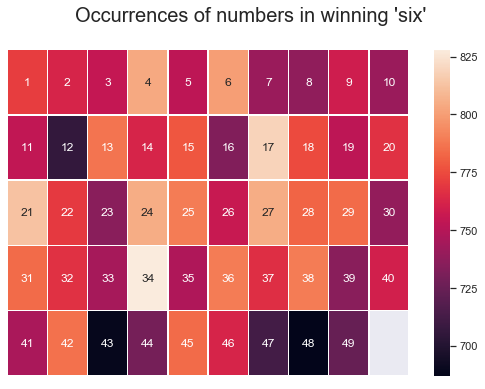

In [2]:
def flatten_list(collection):
    return reduce(operator.iconcat, collection, [])


def convert_list_of_tuples_to_2D_array():
    # add occurancies for 50 number
    occurrences.append(min(occurrences))
    np_data = np.array(occurrences)
    two_dim_data = np_data.reshape((5, 10))
    return two_dim_data

sns.set()
data = pd.read_csv("data/lotto.csv")
rows = data["winning_numbers"].drop_duplicates()
winning_numbers_list = flatten_list(map(lambda number_list: map(int, number_list.split(',')), rows))
winning_numbers_counter = Counter(winning_numbers_list)
sorted_winning_numbers_by_key = sorted(winning_numbers_counter.items(), key=operator.itemgetter(0))
occurrences = list(map(lambda x: x[1], sorted_winning_numbers_by_key))
result = convert_list_of_tuples_to_2D_array()
mask = np.zeros_like(result)
mask[-1,-1] = 1
annot = np.arange(1,51).reshape((5,10))
f, ax = plt.subplots(figsize=(9, 6))
f.suptitle("Occurrences of numbers in winning 'six'", fontsize=20)
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
sns.heatmap(result, linewidths=.5, ax=ax,annot = annot,mask = mask)


/Users/patryksladek/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Text(0.5, 1.0, 'Number of terrorist attacks by world regions')

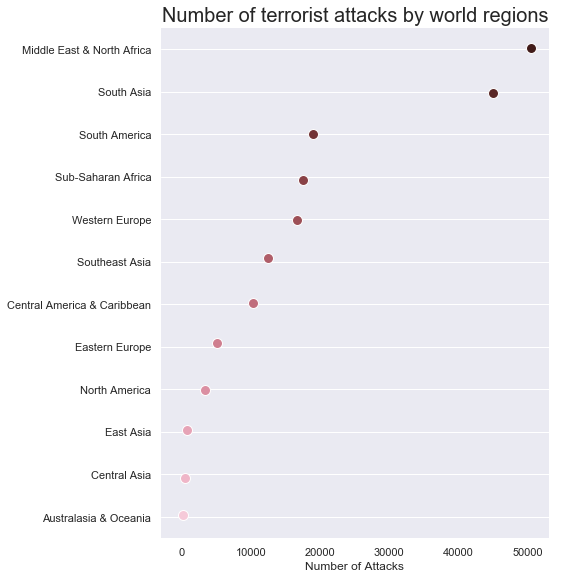

In [8]:
terrorist_attacks = pd.read_csv("data/terrorist_attacks.csv",encoding = "ISO-8859-1")
data = terrorist_attacks.groupby('region_txt',as_index = False)[['eventid']].count()
# Initialize the FacetGrid object
#pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
#sns.FacetGrid(data, row='region_txt',col='eventid',hue='eventid', aspect=15, height=.5, palette=pal)
data_sorted = data.sort_values("eventid",ascending = False)
g = sns.PairGrid(data_sorted,x_vars = ["eventid"], y_vars=["region_txt"],
                 height=8, aspect=.8)
g.map(sns.stripplot, size=10, orient="h",
      palette="ch:s=1,r=-.1,h=1_r", linewidth=1, edgecolor="w")
g.set(xlabel="Number of Attacks", ylabel="")
for ax in g.axes.flat:
    ax.xaxis.grid(False)
    ax.yaxis.grid(True)
sns.despine(left=True, bottom=True)
plt.title("Number of terrorist attacks by world regions", fontsize = 20)